# (week3)Home Credit Default Risk：債務不履行
<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/9120/logos/header.png' width=１００%>

>```aim```
> + 実データに近いものの分析を行う
> + データセットに対して自ら課題を設定できるようにする

>```Cf.```
>
> + [kaggle1位の解析手法　「Home Credit Default Risk 債務不履行の予測」①データ理解 - S-Analysis](https://data-analysis-stats.jp/kaggle/kaggle1%E4%BD%8D%E3%81%AE%E8%A7%A3%E6%9E%90%E6%89%8B%E6%B3%95%E3%80%80%E3%80%8Chome-credit-default-risk-%E5%82%B5%E5%8B%99%E4%B8%8D%E5%B1%A5%E8%A1%8C%E3%81%AE%E4%BA%88%E6%B8%AC%E3%80%8D%E2%91%A0/)
> + [Choosing Plot Types and Custom Styles -kaggle](https://www.kaggle.com/alexisbcook/choosing-plot-types-and-custom-styles)
> + [Home-Credit-Default-Risk - github](https://github.com/KazukiOnodera/Home-Credit-Default-Risk) 実コンペで２位のランカーのコード
> + [データ尺度の違いによる相関関係を数値化する方法の種類 - 統計学が わかった！](https://toukeigaku-jouhou.info/2018/09/13/kind-of-correlation/)

In [1]:
import numpy as np
import pandas as pd

#Visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

---
## 【問題1】コンペティション内容の把握
>     コンペティションのOverviewページ読み、
>     「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。
>      - Home Creditはどのような企業？
>      - このコンペティションでは何を予測する？
>      - それを予測することで企業が得られるメリットは何？

> ```《推奨参考Notebooks》```
> + [Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)
> + [HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)
> + [HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)
>
>    (この他タイトルにEDAと付いているものを参考にしてください。)

**1. Home Creditはどのような企業？**
> Home Credit BVは、1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関です。
>
> cf. [Home Credit - wikipedia](https://en.wikipedia.org/wiki/Home_Credit)

**2. このコンペティションでは何を予測する？**
> クライアントの返済能力を予測

**3. それを予測することで企業が得られるメリットは何？**
> 返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供することが可能となる

#### column 
|||
|:---|:---|
|SK_ID_CURR|私たちのサンプル中のローンのID|
|TARGET|ターゲット変数（1  - 支払が困難なクライアント：彼/彼女は私たちのサンプル、0でローンの最初のYの分割払いの少なくとも一方にX日以上延滞していた - 他のすべての場合）|
|NAME_CONTRACT_TYPE|識別ローンは、現金または回転であれば|
|CODE_GENDER|クライアントの性別|
|FLAG_OWN_CAR|フラグクライアントが車を所有している場合|
|FLAG_OWN_REALTY|旗クライアントは、家やフラットを所有している場合|
|CNT_CHILDREN|子供の人数クライアントが持っています|
|AMT_INCOME_TOTAL|クライアントの収入|
|AMT_CREDIT|ローンの与信額|
|AMT_ANNUITY|ローン年金|
|AMT_GOODS_PRICE|消費者ローンのために、それは、ローンが与えられるため、商品の価格です|
|NAME_TYPE_SUITE|彼は融資を申請されたとき、誰が、クライアントに付随して|
|NAME_INCOME_TYPE|クライアントの収入の種類（実業家、作業、産休、...）|
|NAME_EDUCATION_TYPE|最高の教育の水準クライアントを実現|
|NAME_FAMILY_STATUS|クライアントの家族の状況|
|NAME_HOUSING_TYPE|クライアントの住宅事情は何である（親と同居、レンタル、...）|
|REGION_POPULATION_RELATIVE|地域の正規化された人口クライアント命（高い数はより多くの人口地域のクライアントの生活を意味します）|
|DAYS_BIRTH|塗布時の日中のクライアントの年齢|
|DAYS_EMPLOYED|何日前に申請人は、現在の雇用を開始しました|
|DAYS_REGISTRATION|何日の適用前に、クライアントは自分の登録を変更しました|
|DAYS_ID_PUBLISH|何日アプリケーションは、クライアントは、彼がローンを適用したと身分証明書を変更する前になかったです|
|OWN_CAR_AGE|クライアントの車の時代|
|FLAG_MOBIL|クライアントは、（1 = YES、0 = NO）、携帯電話を提供しました|
|FLAG_EMP_PHONE|クライアントは、職場の電話を提供しました（1 = YES、0 = NO）|
|FLAG_WORK_PHONE|クライアントは、自宅の電話を提供しました（1 = YES、0 = NO）|
|FLAG_CONT_MOBILE|携帯電話の到達可能（1 = YES、0 = NO）でした|
|FLAG_PHONE|クライアントは、自宅の電話を提供しました（1 = YES、0 = NO）|
|FLAG_EMAIL|クライアントは、電子メール（1 = YES、0 = NO）を提供しました|
|OCCUPATION_TYPE|クライアントは、職業のどのような種類を持っていません|
|CNT_FAM_MEMBERS|クライアントは、どのように多くの家族を持っていません|
|REGION_RATING_CLIENT|クライアントが住んでいる地域の当社の評価（1,2,3）|
|REGION_RATING_CLIENT_W_CITY|クライアントは、アカウントに街を取ると住ん地域の当社の評価（1,2,3）|
|WEEKDAY_APPR_PROCESS_START|週のどの日に、クライアントが融資を申請しました|
|HOUR_APPR_PROCESS_START|およそ何時間でクライアントが融資を申請しました|
|REG_REGION_NOT_LIVE_REGION|クライアントのパーマネントアドレスは（地域レベルで、0 =同じ、1 =別の）連絡先住所と一致しない場合には旗|
|REG_REGION_NOT_WORK_REGION|クライアントのパーマネントアドレスは（地域レベルで、0 =同じ、1 =異なる）勤務先住所と一致しない場合には旗|
|LIVE_REGION_NOT_WORK_REGION|旗、クライアントの連絡先アドレスは、（地域レベルで、1 =異なる、0 =同じ）勤務先住所と一致しない場合|
|REG_CITY_NOT_LIVE_CITY|クライアントのパーマネントアドレスは（都市レベルで、0 =同じ、1 =別の）連絡先住所と一致しない場合には旗|
|REG_CITY_NOT_WORK_CITY|旗クライアントの恒久的なアドレスは（都市レベルで、1 =異なる、0 =同じ）勤務先住所と一致しない場合|
|LIVE_CITY_NOT_WORK_CITY|旗、クライアントの連絡先アドレスは、（都市レベルで、1 =異なる、0 =同じ）勤務先住所と一致しない場合|
|ORGANIZATION_TYPE|クライアントが動作するところの組織の種類|
|EXT_SOURCE_1|外部データソースからの正規化スコア|
|EXT_SOURCE_2|外部データソースからの正規化スコア|
|EXT_SOURCE_3|外部データソースからの正規化スコア|
|APARTMENTS_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|BASEMENTAREA_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BEGINEXPLUATATION_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BUILD_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|COMMONAREA_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ELEVATORS_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ENTRANCES_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMAX_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMIN_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LANDAREA_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAPARTMENTS_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAREA_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAPARTMENTS_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAREA_AVG|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|APARTMENTS_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|BASEMENTAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BEGINEXPLUATATION_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BUILD_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|COMMONAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ELEVATORS_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ENTRANCES_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMAX_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMIN_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LANDAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAPARTMENTS_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAPARTMENTS_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|APARTMENTS_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|BASEMENTAREA_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BEGINEXPLUATATION_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|YEARS_BUILD_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|COMMONAREA_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ELEVATORS_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|ENTRANCES_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMAX_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FLOORSMIN_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LANDAREA_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAPARTMENTS_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|LIVINGAREA_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAPARTMENTS_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|NONLIVINGAREA_MEDI|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|FONDKAPREMONT_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|HOUSETYPE_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|TOTALAREA_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|WALLSMATERIAL_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|EMERGENCYSTATE_MODE|建物についての正規化された情報は、何が（_AVG接尾辞）、モデュス（_MODEサフィックス）、中央値（_MEDIサフィックス）アパートの大きさ、共通領域、リビングエリア、建物の年齢、エレベーターの数、入り口の数、状態平均クライアント命です床の建物の、数|
|OBS_30_CNT_SOCIAL_CIRCLE|どのように多くのデフォルト（延滞日）に観察30 DPDとクライアントの社会的な環境の観測|
|DEF_30_CNT_SOCIAL_CIRCLE|30 DPD（延滞日数）にどのように多くのクライアントの社会的な環境の観測をデフォルトに設定|
|OBS_60_CNT_SOCIAL_CIRCLE|どのように多くのデフォルト（延滞日）に観察60 DPDとクライアントの社会的な環境の観測|
|DEF_60_CNT_SOCIAL_CIRCLE|どのように多くのクライアントの社会的な環境の観察は、DPD（延滞日）60不履行|
|DAYS_LAST_PHONE_CHANGE|何日アプリケーションがクライアントの変更の電話をした前に、|
|FLAG_DOCUMENT_2|クライアントは、ドキュメントを提供しました2|
|FLAG_DOCUMENT_3|クライアントは、ドキュメントを提供しました3|
|FLAG_DOCUMENT_4|クライアントは、ドキュメントを提供しました4|
|FLAG_DOCUMENT_5|クライアントは、ドキュメントを提供しました5|
|FLAG_DOCUMENT_6|クライアントは、ドキュメントを提供しました6|
|FLAG_DOCUMENT_7|クライアントは、ドキュメントを提供しました7|
|FLAG_DOCUMENT_8|クライアントは、ドキュメントを提供しました8|
|FLAG_DOCUMENT_9|クライアントは、ドキュメントを提供しなかった9|
|FLAG_DOCUMENT_10|クライアントは、文書10を提供しました|
|FLAG_DOCUMENT_11|クライアントは、文書11を提供しました|
|FLAG_DOCUMENT_12|クライアントは、文書12を提供しました|
|FLAG_DOCUMENT_13|クライアントは、文書13を提供しました|
|FLAG_DOCUMENT_14|クライアントは、文書14を提供しました|
|FLAG_DOCUMENT_15|クライアントは、文書15を提供しました|
|FLAG_DOCUMENT_16|クライアントは、文書16を提供しました|
|FLAG_DOCUMENT_17|クライアントは、文書17を提供しました|
|FLAG_DOCUMENT_18|クライアントは、文書18を提供しました|
|FLAG_DOCUMENT_19|クライアントは、文書19を提供しました|
|FLAG_DOCUMENT_20|クライアントは、文書20を提供しました|
|FLAG_DOCUMENT_21|クライアントは、文書21を提供しました|
|AMT_REQ_CREDIT_BUREAU_HOUR|適用する前に、クライアント一時間程度信用調査への問い合わせ件数|
|AMT_REQ_CREDIT_BUREAU_DAY|適用する前に、クライアント1日程度クレジットビューローへの問い合わせの数（適用前の1時間を除きます）|
|AMT_REQ_CREDIT_BUREAU_WEEK|一週間前にアプリケーションクライアントに関するクレジットビューローへの問い合わせの数（適用前の1日を除きます）|
|AMT_REQ_CREDIT_BUREAU_MON|1ヶ月前にアプリケーションクライアントに関するクレジットビューローへの問い合わせの数（適用前に一週間を除きます）|
|AMT_REQ_CREDIT_BUREAU_QRT|（申請前1ヶ月を除く）3ヶ月前にアプリケーションクライアントに関するクレジットビューローへの問い合わせ件数|
|AMT_REQ_CREDIT_BUREAU_YEAR|（申請前の最後の3ヶ月を除く）、クライアント1日約1年クレジットビューローへの問い合わせ件数|
|SK_ID_CURR|私たちのサンプル中のローンのIDは - 私たちのサンプル中の1つのローンは信用調査機関で0,1,2以上の関連以前のクレジットを持つことができます|
|SK_BUREAU_ID|私たちのローンに関連する以前の信用調査のクレジット（各ローン申請のためのユニークな符号化）の録画ID|
|CREDIT_ACTIVE|クレジットビューロー（CB）の状況は、クレジットを報告しました|
|CREDIT_CURRENCY|クレジットビューローの信用の録画通貨|
|DAYS_CREDIT|クライアントは、クレジットビューローの信用のために何日現在の適用前に適用されませんでした|
|CREDIT_DAY_OVERDUE|私たちのサンプルの関連ローンの申請時のCBの信用上の延滞日数|
|DAYS_CREDIT_ENDDATE|ホームクレジットでのアプリケーションの時点で（日中）CBクレジットの残りの期間|
|DAYS_ENDDATE_FACT|CBのクレジットは（のみ閉じ信用のため）ホームクレジットでのアプリケーションの時点で終了してからの日数|
|AMT_CREDIT_MAX_OVERDUE|これまでの信用調査のクレジットで延滞達する最大（このサンプルでは、​​ローンの申請日において）|
|CNT_CREDIT_PROLONG|クレジットビューロークレジットはどのように多くの時間延長しました|
|AMT_CREDIT_SUM|クレジットビューローの信用のための現在の与信額|
|AMT_CREDIT_SUM_DEBT|クレジットビューローの信用上の現在の債務|
|AMT_CREDIT_SUM_LIMIT|クレジットビューローに報告されたクレジットカードの現在の与信限度|
|AMT_CREDIT_SUM_OVERDUE|クレジットビューローの信用上の延滞電流量|
|CREDIT_TYPE|信用調査のクレジットの種類（車、現金、...）|
|DAYS_CREDIT_UPDATE|何日ローン申請はクレジットビューローの信用についての最後の情報が来たの前に|
|AMT_ANNUITY|クレジットビューローの信用の年金|
|SK_BUREAU_ID|クレジットビューローの録画IDクレジット（ユニーク各アプリケーションのためのコーディング） -  CREDIT_BUREAUテーブルに参加するためにこれを使用|
|MONTHS_BALANCE|出願日にバランスの相対月（-1手段新鮮なバランス日）|
|STATUS|月にクレジットビューローローンのステータス（アクティブ、クローズ、DPD0-30、... [C手段は2つの手段DPD 31から60、Xは、0手段なしDPDをステータス不明を意味し、1つの手段の最大は1-30の間の月の間に行った、閉じた状態、... 5つの手段DPD 120以上または売却または償却]）|
|SK_ID_PREV|ホームクレジットの前の信用のIDは、我々のサンプル中のローンに関連します。 （私たちのサンプル中の1つのローンは、ホームクレジットで0,1,2またはそれ以上の以前のローンを持つことができます）|
|SK_ID_CURR|私たちのサンプル中のローンのID|
|MONTHS_BALANCE|出願日までバランスの相対的な月（新鮮な毎月のスナップショットに-1手段の情報、アプリケーションで0手段情報 - 多くの場合、それは同じになります-1多くの銀行が定期的にクレジットビューローに情報を更新していないとして）|
|CNT_INSTALMENT|以前のクレジットの期間（時間の経過とともに変化することができます）|
|CNT_INSTALMENT_FUTURE|分割払いは以前クレジットで支払うに委ね|
|NAME_CONTRACT_STATUS|月中の契約状況|
|SK_DPD|以前の信用の月にDPD（延滞日数）|
|SK_DPD_DEF|以前の信用の公差月にDPD（低い融資額と債務は無視されます）|
|SK_ID_PREV|私たちのサンプル中のローンに関連したホームの信用の前の信用のID。 （私たちのサンプル中の1つのローンは、ホームクレジットで0,1,2またはそれ以上の以前のローンを持つことができます）|
|SK_ID_CURR|私たちのサンプル中のローンのID|
|MONTHS_BALANCE|出願日にバランスの相対月（-1手段新鮮なバランス日）|
|AMT_BALANCE|以前の信用の月の間にバランス|
|AMT_CREDIT_LIMIT_ACTUAL|以前の信用の月にクレジットカードの限度|
|AMT_DRAWINGS_ATM_CURRENT|以前の信用の月にATMで描画量|
|AMT_DRAWINGS_CURRENT|前回のクレジット月中の描画量|
|AMT_DRAWINGS_OTHER_CURRENT|以前の信用の月の間に他の図面の量|
|AMT_DRAWINGS_POS_CURRENT|金額描画または前のクレジット月中に商品を購入します|
|AMT_INST_MIN_REGULARITY|以前の信用の今月の最小限の割賦|
|AMT_PAYMENT_CURRENT|前回のクレジットでの月中にクライアントの賃金をどのくらいをしました|
|AMT_PAYMENT_TOTAL_CURRENT|前回のクレジットで、合計で月中にクライアントの賃金をどのくらいをしました|
|AMT_RECEIVABLE_PRINCIPAL|以前のクレジットの元本の金額の受取|
|AMT_RECIVABLE|以前のクレジットの金額受取|
|AMT_TOTAL_RECEIVABLE|以前のクレジットの合計額の受取|
|CNT_DRAWINGS_ATM_CURRENT|前回のクレジット今月中にATMでの図面の数|
|CNT_DRAWINGS_CURRENT|以前の信用上の今月中の図面の数|
|CNT_DRAWINGS_OTHER_CURRENT|以前の信用に今月中に他の図面の数|
|CNT_DRAWINGS_POS_CURRENT|以前の信用に今月中に物品のための図面の数|
|CNT_INSTALMENT_MATURE_CUM|前回のクレジットで有料分割払いの数|
|NAME_CONTRACT_STATUS|以前のクレジットの契約状況（アクティブ署名、...）|
|SK_DPD|以前の信用上の月中のDPD（延滞日数）|
|SK_DPD_DEF|以前の信用の公差月（低い融資額と債務が無視される）中にDPD（延滞日数）|
|SK_ID_PREV|私たちのサンプル中のローンに関連したホームの信用の前の信用のID。 （私たちのサンプル中の1つのローンはホームクレジットで0,1,2以上前のローンアプリケーションを持つことができ、以前のアプリケーションは、必ずしも信用につながるする必要はありませんでした）|
|SK_ID_CURR|私たちのサンプル中のローンのID|
|NAME_CONTRACT_TYPE|以前のアプリケーションの契約製品の種類（現金ローン、消費者ローン[POS]、...）|
|AMT_ANNUITY|以前のアプリケーションの年金|
|AMT_APPLICATION|クライアントは、前のアプリケーションにどのくらい信用を尋ねなかったため|
|AMT_CREDIT|以前のアプリケーション上で、最終的なクレジット。 AMT_APPLICATIONは、クライアントが最初に適用される量であるが、私たちの承認プロセスの間に、彼は別の金額を受け取っている可能性があることのようにAMT_APPLICATIONからこの異なっ -  AMT_CREDIT|
|AMT_DOWN_PAYMENT|以前のアプリケーション上の頭金|
|AMT_GOODS_PRICE|以前のアプリケーション上のクライアントがを求めていることは良いの商品代金（該当する場合）|
|WEEKDAY_APPR_PROCESS_START|週のどの日に、クライアントは以前のアプリケーションに適用されませんでした|
|HOUR_APPR_PROCESS_START|およそ何日の時間に、クライアントは以前のアプリケーションに適用されませんでした|
|FLAG_LAST_APPL_PER_CONTRACT|旗には、以前の契約のための最後のアプリケーションだった場合。時には、クライアントの間違いまたは当社の店員によって1つの契約のためのより多くのアプリケーションがあるかもしれません|
|NFLAG_LAST_APPL_IN_DAY|旗アプリケーションは、クライアントの一日あたりの最後のアプリケーションだった場合。時には、クライアントは一日より多くのアプリケーションに適用されます。まれに、それも一つのアプリケーションが二度データベース内にあることを我々のシステムではエラーであることができませんでした|
|NFLAG_MICRO_CASH|旗マイクロファイナンスのローン|
|RATE_DOWN_PAYMENT|前回のクレジットで正規化頭金率|
|RATE_INTEREST_PRIMARY|前回のクレジットで正規化した金利|
|RATE_INTEREST_PRIVILEGED|前回のクレジットで正規化した金利|
|NAME_CASH_LOAN_PURPOSE|現金ローンの目的|
|NAME_CONTRACT_STATUS|以前のアプリケーションの契約状況（承認、キャンセル、...）|
|DAYS_DECISION|現在のアプリケーションへの相対以前のアプリケーションについての決定がなされたとき、|
|NAME_PAYMENT_TYPE|クライアントは、以前のアプリケーションのために支払うことを選んだことをお支払方法|
|CODE_REJECT_REASON|なぜ以前のアプリケーションが拒否されました|
|NAME_TYPE_SUITE|前のアプリケーションに適用するときに、クライアントに同行者|
|NAME_CLIENT_TYPE|クライアント古いまたは新しいクライアントは、以前のアプリケーションのために適用されたとき|
|NAME_GOODS_CATEGORY|クライアントは、以前のアプリケーションでのための商品のどのような種類を適用しませんでした|
|NAME_PORTFOLIO|現金のための以前のアプリケーション、POS、車でした...|
|NAME_PRODUCT_TYPE|ウォークインのO以前のアプリケーションX-販売ました|
|CHANNEL_TYPE|どのチャネルを通して、私たちは以前のアプリケーションにクライアントを取得しました|
|SELLERPLACE_AREA|以前のアプリケーションの売り手地の面積を販売|
|NAME_SELLER_INDUSTRY|売り手の業界|
|CNT_PAYMENT|以前のアプリケーションのアプリケーションで以前のクレジットの用語|
|NAME_YIELD_GROUP|以前のアプリケーションの中小・高に分類金利|
|PRODUCT_COMBINATION|以前のアプリケーションの詳細な製品の組み合わせ|
|DAYS_FIRST_DRAWING|以前のアプリケーションの最初の支出だったときに、現在のアプリケーションの出願日への相対|
|DAYS_FIRST_DUE|現在のアプリケーションの出願日への相対最初の原因は、以前のアプリケーションであることになっていたとき、|
|DAYS_LAST_DUE_1ST_VERSION|以前のアプリケーションの最初の原因だったときに、現在のアプリケーションの出願日への相対|
|DAYS_LAST_DUE|以前のアプリケーションの最終期日だったときに、現在のアプリケーションの出願日への相対|
|DAYS_TERMINATION|以前のアプリケーションの予想終了だったときに、現在のアプリケーションの出願日への相対|
|NFLAG_INSURED_ON_APPROVAL|クライアントは、以前のアプリケーションの間に保険を要求しました|
|SK_ID_PREV|私たちのサンプル中のローンに関連したホームの信用の前の信用のID。 （私たちのサンプル中の1つのローンは、ホームクレジットで0,1,2またはそれ以上の以前のローンを持つことができます）|
|SK_ID_CURR|私たちのサンプル中のローンのID|
|NUM_INSTALMENT_VERSION|以前のクレジットの分割払いカレンダーのバージョン（0クレジットカードのためです）。支払いカレンダーのいくつかのパラメータが変更されたことの月が意味する月から割賦バージョンの変更|
|NUM_INSTALMENT_NUMBER|これは割賦で私達は支払を観察します|
|DAYS_INSTALMENT|以前のクレジットの分割払いは、（現在のローンの出願日と比較して）支払われることになったとき|
|DAYS_ENTRY_PAYMENT|以前のクレジットの分割払いは、（現在のローンの申請日に比べて）実際に支払われた場合には|
|AMT_INSTALMENT|この割賦で前の信用の所定の割賦金額は何でした|
|AMT_PAYMENT|どのようなクライアントは、実際にこの割賦で以前クレジットで支払いました|

In [2]:
df = pd.read_csv('input/application_train.csv')

---
## 【問題2】データの概観の把握
>      データの概観を把握するために以下のようなことを行ってください。
>       - .head()、.info()、describe()などを使う
>       - 欠損値の有無を見る
>       - クラスの割合がわかるグラフを描く
>      それぞれ結果に対する説明や考察も行ってください。

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.isnull().any()

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

<AxesSubplot:ylabel='TARGET'>

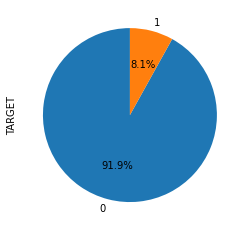

In [8]:
df['TARGET'].value_counts(dropna=False).plot(kind='pie', figsize=(4, 4), startangle=90, autopct="%1.1f%%")

> ```(考察)```
> 目的変数（TARGET）
>> + 1: 支払が困難なクライアント
>> + 0: それ以外の場合
>
> 上記の円グラフより、91.9%の人がそれ以外の場合に該当することがわかる。
> 支払いが困難な人の割合が8.1%と少ないので、予測する際は。０の特徴量を否定した値から予測するかと考えられる。

---
## 【問題3】課題設定
> データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

> ```課題・疑問```
> + 貸付に最も寄与する相関関係ある特徴量を探す 
> + 1に分類される人、０に分類される人の特徴は？
    - 資産（e.g. 家、車）がない人は借りれないのか？
    - 収入 差によって貸付が行われるのか？
    - 性別 差によって貸付が行われるのか？
    - 年代 差によって貸付が行われるのか？
    - 職業 差によって貸付が行われるのか？
    - 資産（車、家）） 差によって貸付が行われるのか？
> + 

---
## 【問題4】データ探索
>     問題3で設定した課題・疑問を解決するためにデータ探索を進めます。
>     探索で使用する表やグラフを、考察と共に 15個以上 作成してください。
>     探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

> ```Cf.```
> + [pandasのplotメソッドでグラフを作成しデータを可視化 - note.nkmk.me](https://note.nkmk.me/python-pandas-plot/)
> + []()

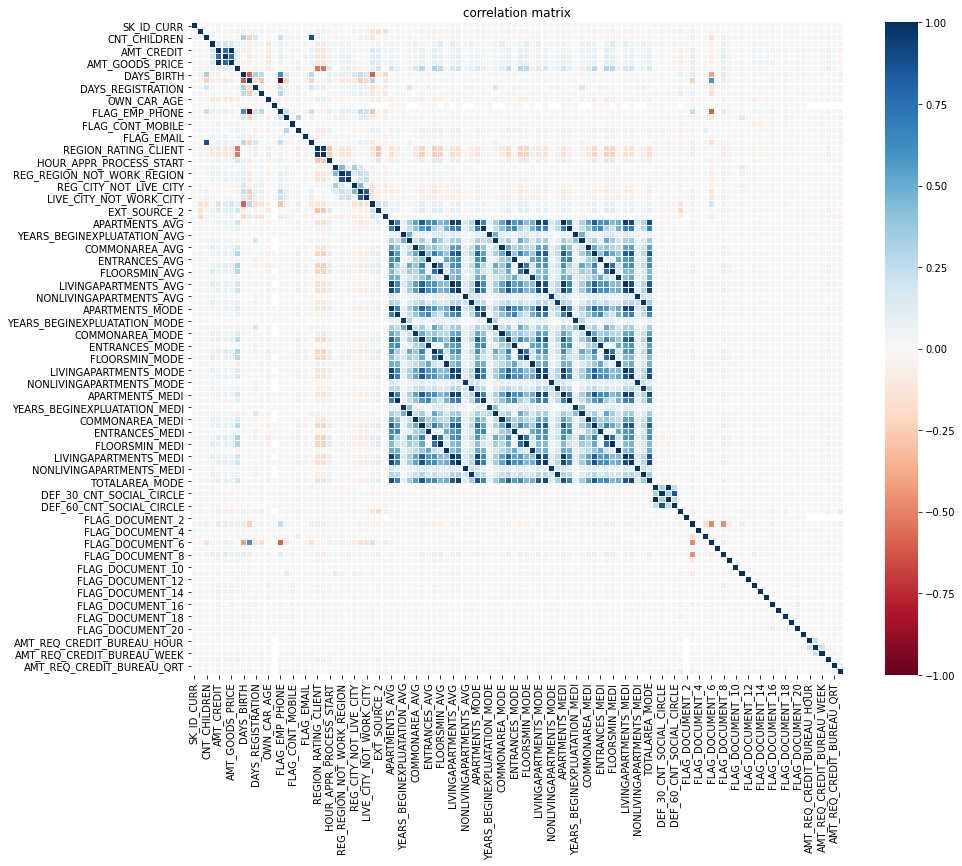

In [9]:
#########################
# １相関関係：ヒートマップ 
#########################

corr = df.corr()

plt.figure(figsize=(15,12))
colormap = plt.cm.RdBu
sns.heatmap(corr, linewidth=0.1, vmax=1.0, vmin=-1.0, square=True, cmap=colormap, linecolor="white", annot=False)
plt.title("correlation matrix")
plt.show()

In [10]:
#########################
# ２相関関係：目的変数別
#########################
corr['TARGET'].sort_values(ascending=False).head(11)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64

In [11]:
#########################
# ３相関関係：目的変数別
#########################
corr['TARGET'].sort_values(ascending=False).tail(10)

ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

In [12]:
#########################
# 4欠損値：リスト
#########################
missing_n = df.isnull().sum()
missing_rate = missing_n / len(df) *100
missing_df = pd.concat([missing_n, missing_rate], axis=1)
missing_df = missing_df.rename(columns={0:'total', 1:'ratio'})
missing_df = missing_df.loc[missing_df['total'] > 0].sort_values(by=['ratio'], ascending=False)
missing_df

,total,ratio
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...
EXT_SOURCE_2,660,0.214626
AMT_GOODS_PRICE,278,0.090403
AMT_ANNUITY,12,0.003902
CNT_FAM_MEMBERS,2,0.000650


<AxesSubplot:>

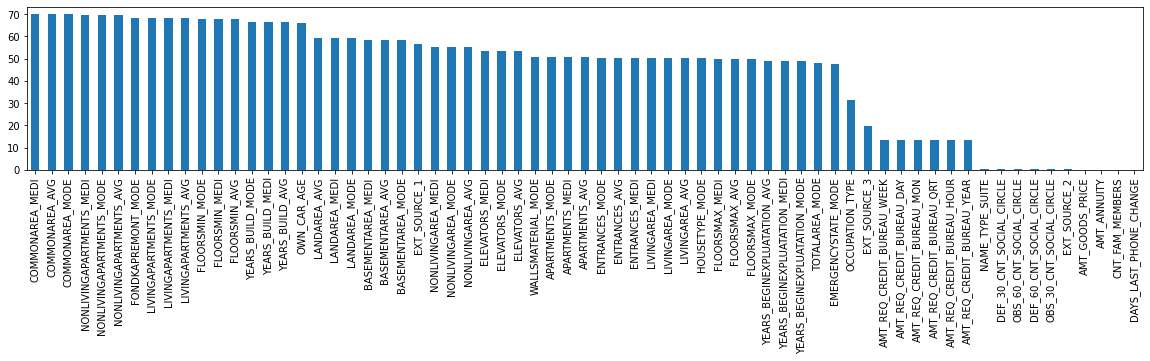

In [13]:
#########################
# ５欠損値：可視化
#########################
missing_df['ratio'].plot(kind='bar', figsize=(20,3))

In [14]:
#########################
# ６欠損値：1000以上削除
#########################
drop_list = []

drop_list.append(missing_df[(missing_df['total'] >= 1000 )].index.values.tolist())
drop_list = np.array(drop_list).squeeze() #ndarray変換して次元を削除
df = df.drop(drop_list, axis=1) 
df.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_BIRTH                       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
FLAG_MOBIL                       0
FLAG_EMP_PHONE                   0
FLAG_WORK_PHONE                  0
FLAG_CONT_MOBILE                 0
FLAG_PHONE                       0
FLAG_EMAIL                       0
CNT_FAM_MEMBERS                  2
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT

In [15]:
filter_0 = df['TARGET'] == 0
filter_1 = df['TARGET'] == 1

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

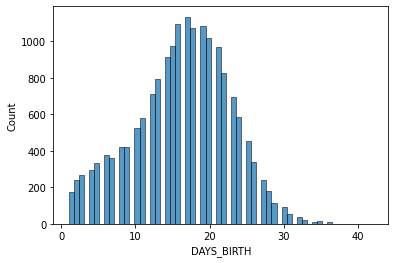

In [16]:
#########################
# 7誕生日別：貸付ができる人
#########################
ok_birth = df[filter_0]['DAYS_BIRTH'].value_counts()
sns.histplot(ok_birth)

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Count'>

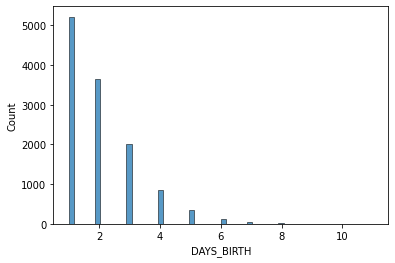

In [17]:
#########################
# 8誕生日別：貸付ができない人
#########################
ng_birth = df[filter_1]['DAYS_BIRTH'].value_counts()
sns.histplot(ng_birth)

<AxesSubplot:ylabel='REGION_RATING_CLIENT_W_CITY'>

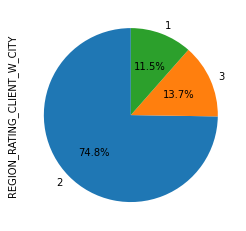

In [18]:
#################################
# 9居住区域の評価別（都市）：貸付ができる人
#################################
ok_wcity = df[filter_0]['REGION_RATING_CLIENT_W_CITY'].value_counts()
ok_wcity.plot(kind='pie', startangle=90, autopct="%1.1f%%")

<AxesSubplot:ylabel='REGION_RATING_CLIENT_W_CITY'>

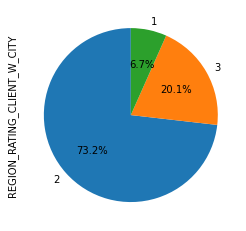

In [19]:
#############################
# 10居住区域の評価別（都市）：貸付ができない人
#############################
ng_wcity = df[filter_1]['REGION_RATING_CLIENT_W_CITY'].value_counts()
ng_wcity.plot(kind='pie', startangle=90, autopct="%1.1f%%")

<AxesSubplot:ylabel='REGION_RATING_CLIENT'>

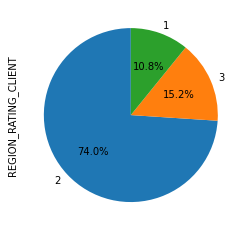

In [22]:
#################################
# 11居住区域の評価別：貸付ができる人
#################################
ok_live = df[filter_0]['REGION_RATING_CLIENT'].value_counts()
ok_live.plot(kind='pie', startangle=90, autopct="%1.1f%%")

<AxesSubplot:ylabel='REGION_RATING_CLIENT'>

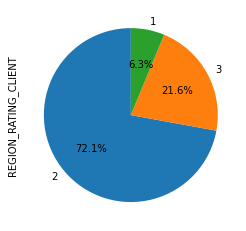

In [23]:
###################################
# 12居住区域の評価別：貸付ができない人
###################################
ng_live = df[filter_1]['REGION_RATING_CLIENT'].value_counts()
ng_live.plot(kind='pie', startangle=90, autopct="%1.1f%%")

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

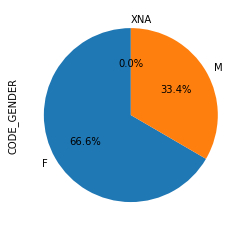

In [24]:
#########################
# 13性別：貸付ができる人
#########################
ok_sex = df[filter_0]['CODE_GENDER'].value_counts(dropna=False)
ok_sex.plot(kind='pie', startangle=90, autopct="%1.1f%%")
ok_sex

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

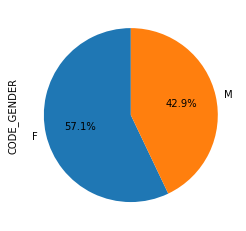

In [25]:
#########################
# 14性別：貸付ができない人
#########################
ng_sex = df[filter_1]['CODE_GENDER'].value_counts(dropna=False)
ng_sex.plot(kind='pie', figsize=(4, 4), startangle=90, autopct="%1.1f%%")
ng_sex

In [26]:
#############################################################
# 15 相関の高そうな説明変数、子持ち、収入、クレジットカード状態をピックアップ
#############################################################
df_pick = df[['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT']]
df_pick.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT
0,1,0,202500.0,406597.5
1,0,0,270000.0,1293502.5
2,0,0,67500.0,135000.0
3,0,0,135000.0,312682.5
4,0,0,121500.0,513000.0


<AxesSubplot:>

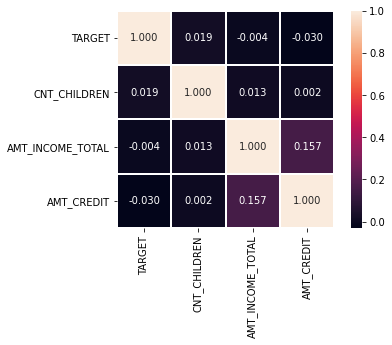

In [33]:
#########################
# 16ピックアップでの相関
#########################
sns.heatmap(df_pick.corr(), annot=True, square=True, fmt='.3f', linecolor='white', linewidth=1)

> ```考察```
> 
> 相関関係の高い特徴量をドリルダウンした。
> + `DAYS_BIRTH(0.078)`
> + `REGION_RATING_CLIENT_W_CITY(0.06)`
> + `REGION_RATING_CLIENT(0.058)`
>
>
>     上記３点から、０(貸付可能)、1(貸付不可能)の方々其々で比較したが目立った特徴がない。
>     更に、主観ではあるが貸付に於いて重視しそうな特徴量を列挙し其々の相関を見た。
>     やはり収入とクレジットの状態の高いことがわかる。
>     しかしながら、データに基づく相関値が誕生日や、居住区域が関係あるとの結果が驚きである。


In [ ]:
# 相関率関数
def correlation_ratio(categories, measurements):
        fcat, _ = pd.factorize(categories)
        cat_num = np.max(fcat)+1
        y_avg_array = np.zeros(cat_num)
        n_array = np.zeros(cat_num)
        for i in range(0,cat_num):
            cat_measures = measurements[np.argwhere(fcat == i).flatten()]
            n_array[i] = len(cat_measures)
            y_avg_array[i] = np.average(cat_measures)
        y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
        numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
        denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
        if numerator == 0:
            eta = 0.0
        else:
            eta = numerator/denominator
        return eta

---
## 【問題5】（アドバンス課題）Notebooksへの投稿
> 必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。